In [1]:
import sys
sys.path.append("../lib")
from pathlib import Path
from input_output_func import write_to_file
path_to_data=Path("../data")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Сдать решение задачи E-Проверка ацикличности графа

Дан ориентированный граф. Вершины пронумерованы от 0. Трeбуется с помощью обхода в глубину проверить является ли граф ацикличным.

Формат входных данных
На вход программе в первой строке подаются через пробел два числа: N (2 <= N <= 1000) - число вершин в графе и M (1 <= M <= 20000) - число ребер. В следующих M строках задаются ребра, по два числа в каждой строке - номера соединенных вершин (соответствующее ребро идет из первой вершины во вторую).

Формат выходных данных
Требуется распечатать номера вершин, задающих цикл в графе если он существует. Номера вершин нужно вывести в порядке следования по циклу. Если циклов несколько вывести любой. Если граф ацикличный вывести строку "YES" без кавычек.



In [3]:
def get_digraph_from_edges(read_str):
    """Gets digraph as adjacency lists from list of edges,
    reading from a stream by read_str method
    first string consists of 2 numbers: number of vertexes and number of edges separated with ' '
    next m strings are edges like 'vertex1_id vertex2_id'
    Returns number of vertexes, number of edges and digraph
    """
    digraph={}
    n,m=map(int,read_str().split())
    for _ in range(m):
        v,u=map(int,read_str().split())
        if v in digraph:
            digraph[v].add(u)
        else:
            digraph[v]={u}
    return digraph
    
def dfs_find_circle2(v_begin,digraph,circle,state):
    """Finds any circle in digraph using dfs method
    Gets digraph as dict of adjacency lists and list of vertexes states:
    0 - not called,white
    1 - called and runnind, grey 
    2 - called end running, black
    circle-list of vertexes in circle in reverced order"""
    state[v_begin]=1
    for v_end in digraph[v_begin]:
        if v_end in digraph:
            if state[v_end]==0:
                if dfs_find_circle2(v_end,digraph,circle,state):
                    if state[v_end]==2:
                        state[v_begin]=2
                        return True
                    circle.append(v_end)
                    return True
            elif state[v_end]==1:
                state[v_end]=2
                circle.append(v_end)
                return True
    state[v_begin]=2
    return False

def find_circle(digraph):
    state=dict(zip(digraph.keys(),[0 for _ in range(len(digraph.keys()))]))
    circle=[]
    for v_begin in digraph:
        if state[v_begin]: continue
        dfs_find_circle2(v_begin,digraph,circle,state)
        if circle:
            return circle[::-1]
    return 0

digraph=get_digraph_from_edges(input)
circle=find_circle(digraph)
if circle:
    print(*circle)
else: print("YES")

2 1
1 1
1


In [4]:
path=path_to_data.joinpath("graph/dfs/E.txt")
text="""10 11
4 7
4 8
8 9
9 4
6 7
7 3
3 1
5 2
6 4
1 6
1 2"""
write_to_file(text,path)
text="""8 8
7 3
3 1
5 2
6 4
6 7
4 7
1 6
1 2"""
path=path_to_data.joinpath("graph/dfs/E1.txt")
write_to_file(text,path)
text="""8 9
1 2
2 3
3 0
0 3
3 4
5 4
5 6
6 7
7 5"""
path=path_to_data.joinpath("graph/dfs/E2.txt")
write_to_file(text,path)

file E.txt is written
file E1.txt is written
file E2.txt is written


8


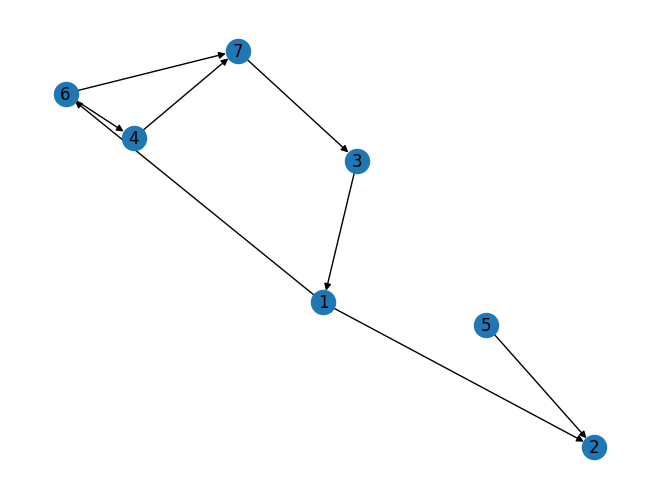

In [5]:
path=path_to_data.joinpath("graph/dfs/E1.txt")
with path.open('r') as file:
    digraph=get_digraph_from_edges(file.readline)

G=nx.DiGraph(digraph)
nx.draw(G,with_labels=True)
print(G.number_of_edges())
plt.show()

In [6]:
res=find_circle(digraph)
if res:
    print(res)
else: print("YES")

[3, 1, 6, 4, 7]


#### F-Топологическая сортировка

Дан ориентированный граф. Вершины пронумерованы от 0. Требуется с помощью топологической сортировки линейно упорядочить вершины графа в список так, чтобы для любого ребра графа из вершины A в вершину B, вершина A была левее чем B в списке.

Формат входных данных
На вход программе в первой строке подаются через пробел два числа: N (2 <= N <= 1000) - число вершин в графе и M (1 <= M <= 20000) - число ребер. В следующих M строках задаются ребра, по два числа в каждой строке - номера соединенных вершин (соответствующее ребро идет из первой вершины во вторую).

Формат выходных данных
Требуется распечатать топологически отсортированный список вершин, если такой существует. Если упорядочить вершины можно несколькими способами выведите любой из них. Если упорядочить вершины нельзя выведите "NO" без кавычек.



In [8]:
def get_digraph_from_edges(read_str):
    """Gets digraph as adjacency lists from list of edges,
    reading from a stream by read_str method
    first string consists of 2 numbers: number of vertexes and number of edges separated with ' '
    next m strings are edges like 'vertex1_id vertex2_id'
    Returns number of vertexes, number of edges and digraph
    """
    digraph={}
    n,m=map(int,read_str().split())
    for _ in range(m):
        v,u=map(int,read_str().split())
        if v in digraph:
            digraph[v].add(u)
        else:
            digraph[v]={u}
    for v in range(n):
        if v not in digraph:
            digraph[v]=set()
    return digraph,n

def dfs_tpl_sort(v_begin,digraph,vertexes,state):
    state[v_begin]=1
    for v_end in digraph[v_begin]:
        if state[v_end]==0:
            if not dfs_tpl_sort(v_end,digraph,vertexes,state):
                return False
        elif state[v_end]==1:
            return False
    state[v_begin]=2
    vertexes.append(v_begin)
    return True

def topological_sort(digraph,n):
    vertexes=[]
    state=[0 for _ in range(n)]
    for v in digraph:
        if not state[v]:
            if not dfs_tpl_sort(v,digraph,vertexes,state):
                return False
    return vertexes[::-1]

digraph,n=get_digraph_from_edges(input)
ans=topological_sort(digraph,n)
if ans:
    print(*ans)
else: print("NO")

3 2
2 0
1 0
1 2 0


In [9]:
text="""8 10
7 3
5 2
6 4
6 7
4 7
1 6
1 2
4 5
0 2
6 0"""
path=path_to_data.joinpath("graph/dfs/F.txt")
write_to_file(text,path)

file F.txt is written


10
8


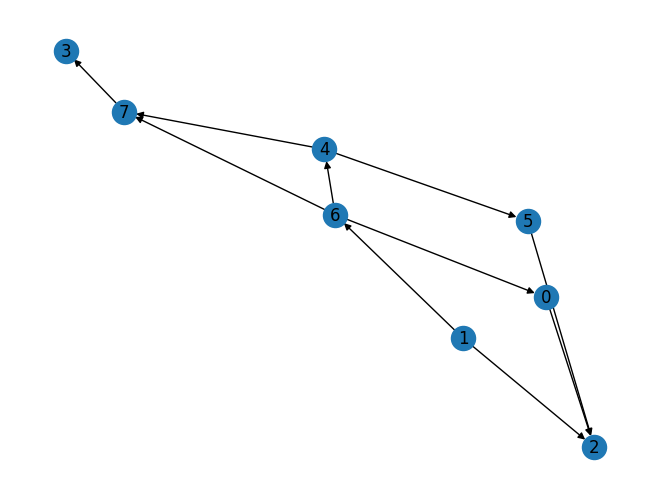

In [10]:
with path.open('r') as file:
    digraph,n=get_digraph_from_edges(file.readline)
G=nx.DiGraph(digraph)
nx.draw(G,with_labels=True)
print(G.number_of_edges())
print(n)
plt.show()

In [11]:
with path.open('r') as f:
    digraph,n=get_digraph_from_edges(f.readline)
ans=topological_sort(digraph,n)
if ans:
    print(*ans)
else: print("NO")

1 6 4 0 5 2 7 3


### G-Долой списывание
Во время контрольной работы профессор заметил, что некоторые студенты обмениваются записками. Сначала он хотел поставить им всем двойки, но в тот день профессор был добрым, а потому решил разделить студентов на две группы: списывающих и дающих списывать, и поставить двойки только первым. У профессора записаны все пары студентов, обменявшихся записками. Требуется определить, сможет ли он разделить студентов на две группы так, чтобы любой обмен записками осуществлялся от студента одной группы студенту другой группы.

Формат входных данных
В первой строке входного файла записаны два числа N и M - количество студентов и количество пар студентов, обменивающихся записками (1≤N≤1000, 0≤M≤20000). Далее в M строках расположены описания пар студентов: два числа, соответствующие номерам студентов, обменивающихся записками (нумерация студентов идёт с 0). Каждая пара студентов перечислена не более одного раза.

Формат выходных данных
Необходимо вывести ответ на задачу профессора. Если возможно разделить студентов на две группы - выведите номера вершин любой из этих групп(тех кому профессор поставит двойки =)) в одной строке через пробел, иначе выведите NO.



In [12]:
def get_graph_from_edges(read_str):
    """Gets graph as adjacency lists from list of edges,
    reading from a stream by read_str method
    first string consists of 2 numbers: number of vertexes and number of edges separated with ' '
    next m strings are edges like 'vertex1_id vertex2_id'
    Returns number of vertexes and graph
    """
    graph={}
    n,m=map(int,read_str().split())
    for _ in range(m):
        v1,v2=map(int,read_str().split())
        for u,v in (v1,v2),(v2,v1):
            if v in graph:
                graph[v].add(u)
            else:
                graph[v]={u}
    for v in range(n):
        if v not in graph:
            graph[v]=set()
    return graph,n

def dfs_bigraph(v_begin,graph,group,next_group=1):
    """ dfs algo to separate graph on 2 group,
    such way, that were's no edges inside each group
    Gets v_begin start dfs vertex,graph,
    group-a list of values wich group is it
    0 - no in group yet
    1 - first group
    2 - second group
    next_group-in wich group is vertex v_begin
    Returns True if it's possible to separate, else returns False
    """
    group[v_begin]=next_group
    next_group=next_group%2+1
    for v_end in graph[v_begin]:
        if group[v_end]==0:
            if not dfs_bigraph(v_end,graph,group,next_group):
                return False
        elif group[v_end]!=next_group:
            return False
    return True

def is_bigraph(graph):
    """Checks is graph a bigraph.
    Gets graph as dict of adjacency lists
    Return list of vertexes groups,
    if it's possible to separates graph on 2 groups,
    else return False
    """
    group=[0 for _ in range(len(graph.keys()))]
    for vertex in graph:
        if not group[vertex]:
            if not dfs_bigraph(vertex,graph,group,next_group=1):
                return False
    return group

graph,n=get_graph_from_edges(input)
ans=is_bigraph(graph)
if ans:
    group1=[]
    for v,group_n in enumerate(ans):
        if group_n==1: group1.append(v)
    print(*group1)
else: print("NO")

2 1
1 0
0


#### H-Постоение гамильтонова цикла

**гамильтоновым циклом** является такой цикл (замкнутый путь), который проходит через каждую вершину данного графа ровно по одному разу; то есть простой цикл, в который входят все вершины графа.

Дан неориентированный граф содержащий гамильтонов цикл, требуется найти этот цикл.

Формат входных данных
На вход программе в первой строке подаются через пробел два числа: N (3 <= N <= 18) - число вершин в графе и M (1 <= M <= 200) - число ребер. В следующих M строках задаются ребра, по два числа в каждой строке - номера соединенных вершин.

Формат выходных данных
Требуется распечатать номера вершин, задающих гамильтонов цикл в графе. Номера вершин нужно вывести в порядке следования по циклу. Если циклов несколько вывести любой.

NP-полная задача, задача комивояжера сводится к задаче поиска минимального гамильтонова цикла(пути) \

In [14]:
text="""3 3
0 2
0 1
1 2"""
path=path_to_data.joinpath("graph/dfs/F.txt")
write_to_file(text,path)
text="""5 6
1 3
3 2
1 0
1 2
4 2
4 0"""
path=path_to_data.joinpath("graph/dfs/F1.txt")
write_to_file(text,path)
text="""7 11
0 6
6 5
4 3
2 4
0 1
5 0
6 3
5 3
4 5
1 6
2 0"""
path=path_to_data.joinpath("graph/dfs/F2.txt")
write_to_file(text,path)

file F.txt exists
file F1.txt is written
file F2.txt is written


In [15]:
def get_graph_from_edges(read_str):
    """Gets graph as adjacency lists from list of edges,
    reading from a stream by read_str method
    first string consists of 2 numbers: number of vertexes and number of edges separated with ' '
    next m strings are edges like 'vertex1_id vertex2_id'
    Returns number of vertexes and graph
    """
    graph={}
    n,m=map(int,read_str().split())
    for _ in range(m):
        v1,v2=map(int,read_str().split())
        for u,v in (v1,v2),(v2,v1):
            if v in graph:
                graph[v].add(u)
            else:
                graph[v]={u}
    for v in range(n):
        if v not in graph:
            graph[v]=set()
    return graph,n

def check_vertex(vertex,graph,used,path,n):
    """Check can be a vertex add in a Hamiltonian cycle path of graph
    Gets vertex, graph,
    used- set of used vertexes
    path- list of used vertexes in bypass order
    n- number of vertexes"""
    assert vertex in graph, "Vertex not in graph"
    used.add(vertex)
    path.append(vertex)
    if len(path)==n:
        if path[0] in graph[vertex]: return True
    else:
        for next_vertex in graph[vertex]:
            if next_vertex not in used:
                if check_vertex(next_vertex,graph,used,path,n):
                    return True
    used.remove(vertex)
    path.pop()
    return False

def find_Hamiltonian_cycle(graph):
    used=set()
    path=[]
    n=(len(graph.keys()))
    vertex=tuple(graph.keys())[0]
    if check_vertex(vertex,graph,used,path,n):
        return path
    return False

#graph,n=get_graph_from_edges(input)
path=path_to_data.joinpath("graph/dfs/F2.txt")
with path.open("r") as file:
    graph,n=get_graph_from_edges(file.readline)
cycle=find_Hamiltonian_cycle(graph)
if cycle:
    print(*cycle)
else: print("NO")

6 1 0 2 4 3 5


11
7


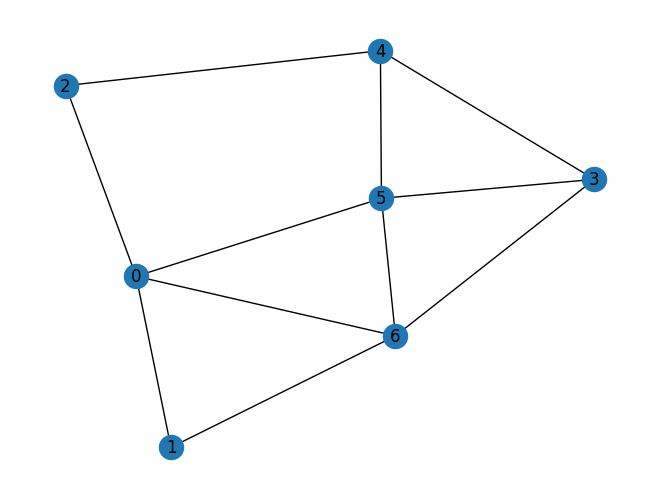

In [16]:
G=nx.Graph(graph)
nx.draw(G,with_labels=True)
print(G.number_of_edges())
print(n)
plt.show()